#### Activity Description: 
      Jio fibre wants to implement AI/ML in their systems. The activity task is to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.
    This database contains a standard set of data to be audited, which includes a wide variety of intrusions in the network environment. Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or good connections using naïve bayes model. This is a multi-class classification. Fine tune the model and make a model which has at least 97 percent accuracy.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data into python environment

data=pd.read_csv('tcp-connection.csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


### Data Preprocessing

In [3]:
# Checking for null values

data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

    There are no null values in the data set

In [4]:
for column in data.columns:
    print(data[column].value_counts())

0        481671
1          2476
2           870
3           625
5           554
          ...  
10031         1
3730          1
2915          1
10629         1
13348         1
Name: duration, Length: 2495, dtype: int64
b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64
b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'tftp_u'          1
b'red_i'           1
b'pm_dump'         1
Name: service, Length: 66, dtype: int64
b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64
1032    228035
0       115342
520      52774
105       7370
147       2725
         ...  
3207         1
3949         1
4043         1
5512         1
2152         1
Name: src_by

    After analysing above information we can see that num_outbound_cmds and is_host_login has only one unique value and hence won't contribute anything to the data. So we can safely remove it.

In [5]:
data['num_outbound_cmds'].value_counts()

0    494021
Name: num_outbound_cmds, dtype: int64

In [6]:
data['is_host_login'].value_counts()

0    494021
Name: is_host_login, dtype: int64

In [7]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)

##### Feature reduction using correlation

In [8]:
# Create correlation matrix
corr_mat = data.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and make Lower triangular values Null
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


C:\Users\linua\AppData\Local\Temp/ipykernel_68756/3820661600.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


In [9]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,0.0,0.0,1.00,0.00,0.01,139,89,0.01,0.00,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,0.0,0.0,1.00,0.00,1.00,5,116,0.00,0.02,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,1.0,0.0,0.03,0.07,0.00,255,6,0.07,0.00,b'neptune.'


In [11]:
data.select_dtypes(include='object').head()

,protocol_type,service,flag,intrusion
0,b'udp',b'domain_u',b'SF',b'normal.'
1,b'tcp',b'smtp',b'SF',b'normal.'
2,b'icmp',b'ecr_i',b'SF',b'smurf.'
3,b'icmp',b'ecr_i',b'SF',b'smurf.'
4,b'tcp',b'private',b'S0',b'neptune.'


Columns protocol_type,service, flag and intrusion are object data type. For ML algorithms to work, we need numeric data types. Hence converting the same to numeric using Label Encoding

In [12]:
# Label Encoding feature variables

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in ['protocol_type','service', 'flag']:
    data[column] = labelencoder.fit_transform(data[column])

In [13]:
data[['protocol_type','service', 'flag']].head()

,protocol_type,service,flag
0,2,11,9
1,1,50,9
2,0,14,9
3,0,14,9
4,1,45,5


In [14]:
# Target Variable

target = data['intrusion'].value_counts()
print('Intrusion types : ', target.shape[0])
print(target.head())

Intrusion types :  23
b'smurf.'      280790
b'neptune.'    107201
b'normal.'      97278
b'back.'         2203
b'satan.'        1589
Name: intrusion, dtype: int64


Categorizing bad connections, called intrusions or attacks, and good normal connections as 0 and 1

In [15]:
data['intrusion'] = np.where(data['intrusion'] == "b'normal.'", 1, 0)

In [16]:
data['intrusion'].value_counts()

0    396743
1     97278
Name: intrusion, dtype: int64

In [17]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,intrusion
0,0,2,11,9,44,134,0,0,0,0,...,0.0,0.0,1.00,0.00,0.01,139,89,0.01,0.00,1
1,0,1,50,9,1489,385,0,0,0,0,...,0.0,0.0,1.00,0.00,1.00,5,116,0.00,0.02,1
2,0,0,14,9,1032,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,0
3,0,0,14,9,1032,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,0
4,0,1,45,5,0,0,0,0,0,0,...,1.0,0.0,0.03,0.07,0.00,255,6,0.07,0.00,0


In [18]:
data.dtypes

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [19]:
data.shape

(494021, 30)

In [20]:
# Preparing into features and target

x = data.drop(["intrusion"], axis=1)
y = pd.DataFrame(data["intrusion"])

In [21]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,0,2,11,9,44,134,0,0,0,0,...,64,0.0,0.0,1.00,0.00,0.01,139,89,0.01,0.00
1,0,1,50,9,1489,385,0,0,0,0,...,1,0.0,0.0,1.00,0.00,1.00,5,116,0.00,0.02
2,0,0,14,9,1032,0,0,0,0,0,...,511,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00
3,0,0,14,9,1032,0,0,0,0,0,...,511,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00
4,0,1,45,5,0,0,0,0,0,0,...,192,1.0,0.0,0.03,0.07,0.00,255,6,0.07,0.00


In [22]:
y.head()

,intrusion
0,1
1,1
2,0
3,0
4,0


In [23]:
# Minmax Scaling
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler(feature_range=(0,1))

x=min_max.fit_transform(x)

In [24]:
x

array([[0.        , 1.        , 0.16923077, ..., 0.34901961, 0.01      ,
        0.        ],
       [0.        , 0.5       , 0.76923077, ..., 0.45490196, 0.        ,
        0.02      ],
       [0.        , 0.        , 0.21538462, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.76923077, ..., 0.48235294, 0.02      ,
        0.        ],
       [0.        , 0.5       , 0.33846154, ..., 1.        , 0.        ,
        0.06      ],
       [0.        , 0.5       , 0.69230769, ..., 0.01176471, 0.07      ,
        0.        ]])

In [25]:
#Splitting dataset into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### Classification Methods

We will use following Naive Bayes classifiers to make the prediction:-

    1) Gaussian Naive Bayes Classifier 
    2) Bernoulli Naive Bayes Classifier
    3) Multinomial Naive Bayes Classifier

#####  1) Gaussian Naive Bayes Classifier 
    In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below:

In [26]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train.values.ravel())
 
# making predictions on the testing set
y_pred = gnb.predict(x_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(%):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(%): 96.79448771719592


In [27]:
# Making confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[97945,  1375],
       [ 2584, 21602]], dtype=int64)

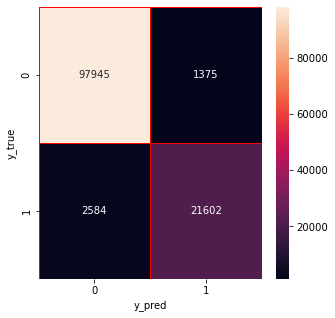

In [28]:
# Plotting confusion matrix

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

##### 2. Bernoulli Naive Bayes
    In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document).

In [29]:
# training the model on training set
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train.values.ravel())
 
# making predictions on the testing set
y_pred = bnb.predict(x_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(%):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(%): 97.48433274496786


In [30]:
# Making confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[98257,  1063],
       [ 2044, 22142]], dtype=int64)

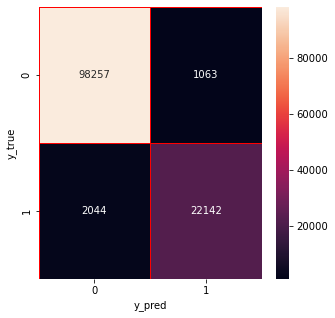

In [31]:
# Plotting confusion matrix

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

##### 3. Multinomial Naive Bayes Classifier
    In Multinomial Naive Bayes,Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification

In [32]:
# training the model on training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train.values.ravel())
 
# making predictions on the testing set
y_pred = mnb.predict(x_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(%):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(%): 95.59535569122149


In [33]:
# Making confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[98182,  1138],
       [ 4302, 19884]], dtype=int64)

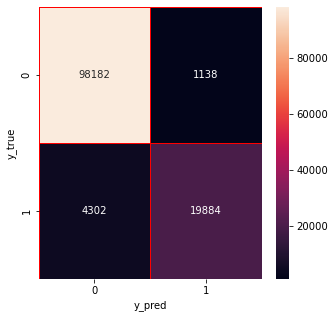

In [34]:
# Plotting confusion matrix

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

##### Insight:

   Bernoulli Naive Bayes Classifier has accuracy score above 97.